# Energy in the Chilled Water System

The chilled water system (CWS) at UIUC is analogous to battery storage because the grid demand on campus feels it like a decrease in load because the chilled water is discharged from the tank before the electric chillers are turned on. To calculate the stored energy value in MWh, we can use:

$Q = mc_p\Delta T$ [J]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import platform

In [2]:
def Q (m, c, delta_T):
    """
    This function calculates the energy stored in joules. 
    
    Parameters:
    -----------
    m : float
        This is the mass of the heated/cooled substance in [kg]
    c : float
        This is the specific heat capacity of the substance in 
        [J/kg C]
    delta_T : float
        This is the change in temperature of the substance. 
    
    Returns:
    --------
    q : float
        The energy stored in the substance. 
    """
    q = m*c*delta_T
    return q


In [3]:
tank_vol = 6.5e6 # gallons

# convert gallons to cubic meters
tank_vol = tank_vol/264

rho_w = 997 # kg/m^3
cp_w = 4186 # j/kg C
dT = 9.1 # C
mass_w = rho_w*tank_vol # kg
Q_cws = Q(mass_w, cp_w, dT)
print("The energy stored in the full CWS tank is {} joules".format(Q_cws))

The energy stored in the full CWS tank is 935072326893.9393 joules


#### Converting Joules to MWh

We can convert Joules to MWh by the following:

$1 W = 1 J/s$ <br>
$1 Wh = 1 J/s * 3600 s/hour$<br>
$1 MWh = 1x10^6 Wh$

So

$ # MWh = # J / (1e6 * 3600)$

In [4]:
Q_MWh = Q_cws / 3.6e9

print("The MWh equivalent in energy storage is {} MWh (thermal)".format(Q_MWh))

The MWh equivalent in energy storage is 259.7423130260943 MWh (thermal)


#### Conversion Efficiency

Chilled water is a form of thermal energy storage. To get the equivalent energy storage in electric energy, a factor of 1/3 is multiplied as an assumption ($\eta = 33\%$)

In [5]:
print("The battery energy equivalent (BEE) is {} MWh (electric)".format(Q_MWh/3))

The battery energy equivalent (BEE) is 86.5807710086981 MWh (electric)


#### Question

This battery equivalent is only true to a certain extent. I probably have to cap the outflow at a certain level, but how much is the question. 

This [document](https://www.districtenergy.org/HigherLogic/System/DownloadDocumentFile.ashx?DocumentFileKey=d7d7ad58-c30a-7f1d-3d74-ab02a2320e6a&forceDialog=0) give some indication of a solution but the reality is I need data from eDNA (enter Mike Marquissee) about the chilled water use on campus. 

I couldn't get information from Mike before the Pandemic struck. So I'm going to use information from the master plan.

In [6]:
import numpy as np
el_eff_ls = np.array([0.637, 0.631, 0.615, 0.580, 0.653, 0.640, 0.640, 0.645, 0.641, 0.676, 0.653, 0.595, 
          1.2, 1.2, 0.676, 0.64, 0.64, 0.64, 0.565, 0.622, 0.634, 0.565])
st_eff_ls = np.array([18,18,11,11])

mean_eleff = el_eff_ls.mean()
mean_steff = st_eff_ls.mean()

print(f"The mean CHW electric efficiency is {round(mean_eleff,2)} KW/TON the mean CHW steam efficiency is {mean_steff} PPH/TON")

The mean CHW electric efficiency is 0.68 KW/TON the mean CHW steam efficiency is 14.5 PPH/TON


This means that for every chiller to be running at maximum capacity simultaneously would require CAPxEFF.

In [7]:
peak_electric = 51860*0.68
peak_electric

35264.8

In [8]:
import pandas as pd
demand = pd.read_csv('./../../data/annual_load2017.csv')
demand

,Unnamed: 0,time,kw
0,0,0,43345.0
1,1,1,43064.0
2,2,2,43035.0
3,3,3,43366.0
4,4,4,43281.0
...,...,...,...
8755,8755,8755,41299.0
8756,8756,8756,41045.0
8757,8757,8757,39193.0
8758,8758,8758,40234.0


In [9]:
demand['kw'].sum()/0.33/1e6

1352.542306069697

# Temoa's model of the CHWS

* total tank capacity: 6.5e6 millon-gallon ~ 24,600 tons-hour [3]
* capacity (only electric): 37,500 tons [3]


### ExistingCapacity

* 1 ton of chilled water ~ 3.5 kWh [1]
* cap = 37,500 tons


### Efficiency

* ELC(MWe) -- x COP --> MWe -- x  --> kilo-tons
* COP = 4.5 [2]
* unit_conversion = 1000/3.5/1e3 [1]
* Efficiency = COP x unit_conversion = 1.286


### CostInvest

* Average installed capital cost: \$ 240/kW [4]
* 1 MW = 1285 tons --> 1 kW = 1.285 tons
* 240 \$ / 1.285 tons = 0.186 M \$ /kilo-tons

### CapacityFactorTech

* 0, 0.5, 1 in the winter, inter, and summer, respectively.

### Storage duration

* total capacity/capacity = 24,600 tons-hour / 37,500 tons = 39.4 min ~ 40 min
* units: years.
* In our case, it is 40 min / 60 min / 8760 h = 7.61e-5

## References:

1. Evans P. Refrigeration Ton Explained. May, 2019. Website. Accessed January, 2020. [link](https://theengineeringmindset.com/refrigeration-ton/)
2. Wikipedia. Coefficient of perfomance. January, 2020. Website. Accessed January, 2020. [link](https://en.wikipedia.org/wiki/Coefficient_of_performance)
3. F&S. Campus Chilled Water. Accessed January, 2020. [link](https://fs.illinois.edu/docs/default-source/utilities-energy/campus-chilled-water-system.pdf?sfvrsn=c91bfbea_0)
4. Andrepont, J. Current Trends in Thermal Storage. The Cool Solutions Company. International District Energy Association (IDEA) Campus Energy Conference. New Orleans, Louisiana. February 27, 2019.
5. ICAP 2015 [link](https://icap.sustainability.illinois.edu/files/project/2634/2015iCAPweb.pdf)

## Other references:

* [FS website](https://fs.illinois.edu/services/utilities-energy/production)
* [FS document](https://www.districtenergy.org/HigherLogic/System/DownloadDocumentFile.ashx?DocumentFileKey=4822a99e-cbcf-734b-39ba-53f57ff94f07&forceDialog=0)
* [online article](https://www.news-gazette.com/news/ui-asks-employees-on-campus-to-cool-it-with-electricity-use/article_d23297d3-14bf-58d1-b781-205bf383d36d.html)
* [HVAC efficiencies](https://www.pge.com/includes/docs/pdfs/about/edusafety/training/pec/inforesource/thrmstor.pdf)

## CHW Demand: Updating with data from F&S

First, I need to clean up the data...

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

cws_data = read_csv("../../data/2019energydata.csv", skiprows=1, usecols=['CWS', 'TES'])

In [11]:
cws_data

,CWS,TES
0,2548.362667,0.0
1,2550.703833,0.0
2,2542.722500,0.0
3,2561.687167,0.0
4,2588.166500,0.0
...,...,...
527036,2381.374167,0.0
527037,2383.906333,0.0
527038,2371.531500,0.0
527039,2386.603500,0.0


In [12]:
daterange = pd.date_range(start='12/31/2018', end='1/1/2020', freq='min')

In [13]:
daterange

DatetimeIndex(['2018-12-31 00:00:00', '2018-12-31 00:01:00',
               '2018-12-31 00:02:00', '2018-12-31 00:03:00',
               '2018-12-31 00:04:00', '2018-12-31 00:05:00',
               '2018-12-31 00:06:00', '2018-12-31 00:07:00',
               '2018-12-31 00:08:00', '2018-12-31 00:09:00',
               ...
               '2019-12-31 23:51:00', '2019-12-31 23:52:00',
               '2019-12-31 23:53:00', '2019-12-31 23:54:00',
               '2019-12-31 23:55:00', '2019-12-31 23:56:00',
               '2019-12-31 23:57:00', '2019-12-31 23:58:00',
               '2019-12-31 23:59:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', length=527041, freq='T')

In [14]:
cws_data.index = daterange

In [15]:
cws_data_hourly = cws_data.resample('H').mean()

In [16]:
cws_data_hourly

,CWS,TES
2018-12-31 00:00:00,2488.723014,0.0
2018-12-31 01:00:00,2474.239964,0.0
2018-12-31 02:00:00,2415.323719,0.0
2018-12-31 03:00:00,2382.694822,0.0
2018-12-31 04:00:00,2343.501850,0.0
...,...,...
2019-12-31 20:00:00,2447.195136,0.0
2019-12-31 21:00:00,2424.341025,0.0
2019-12-31 22:00:00,2403.801064,0.0
2019-12-31 23:00:00,2385.521603,0.0


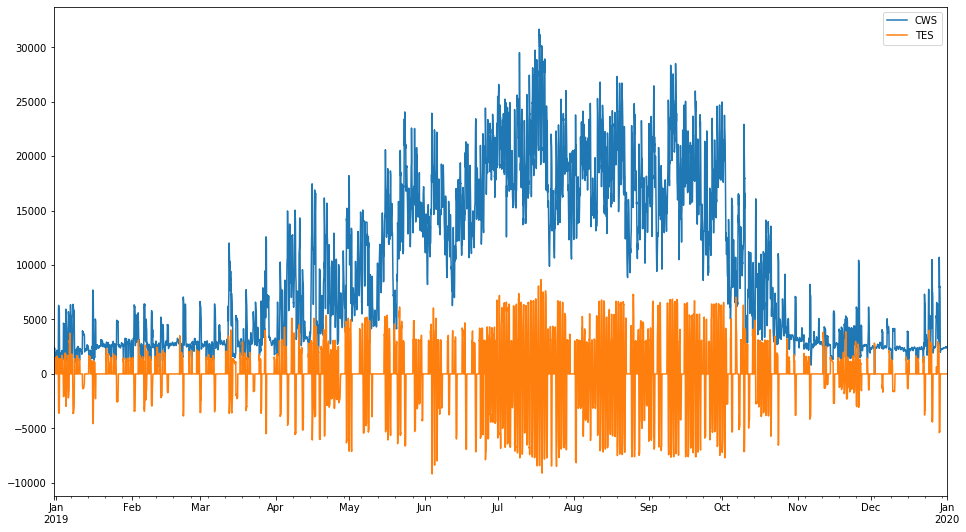

In [17]:
# plt.figure()
cws_data_hourly.plot(figsize=(16,9))

In [20]:
start = pd.to_datetime('2019-07-01')
end = pd.to_datetime('2019-08-01')
datemask = (cws_data_hourly.index > start) & (cws_data_hourly.index < end)

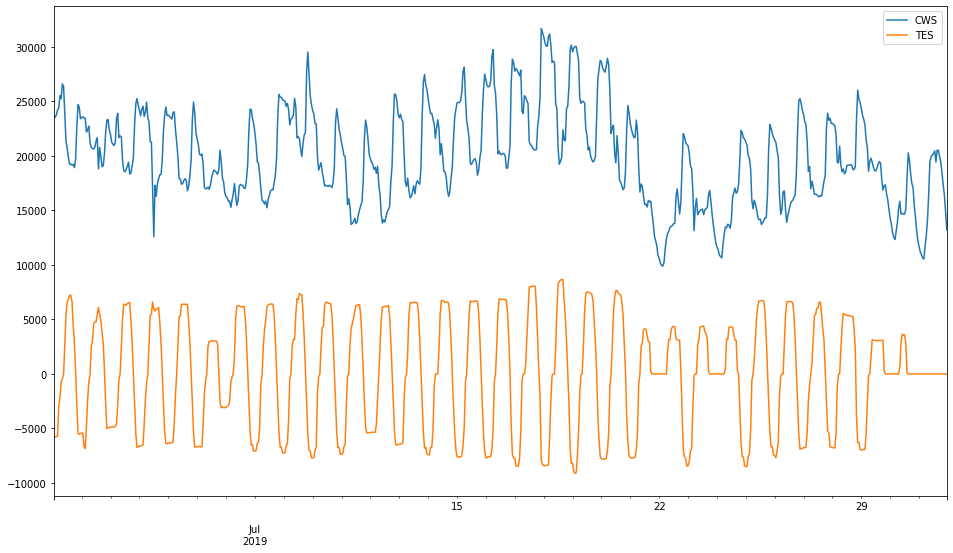

In [21]:
cws_data_hourly[datemask].plot(figsize=(16,9))

In [18]:
cws_data_hourly.CWS.sum()/1e6  # megaton-hours

84.04826791666663

In [19]:
y = 84.05
for x in range(31):
    y = y + 0.01*y
    print(round(y, 2))

84.89
85.74
86.6
87.46
88.34
89.22
90.11
91.01
91.92
92.84
93.77
94.71
95.66
96.61
97.58
98.56
99.54
100.54
101.54
102.56
103.58
104.62
105.66
106.72
107.79
108.87
109.95
111.05
112.17
113.29
114.42
